# Local Search

Buscamos el máximo de una función

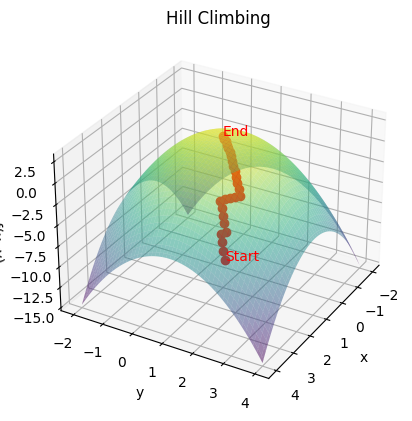

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define la función: f(x, y) = -(x-1)^2 - (y-1)^2 + 3
def objective_function(x, y):
    return -(x-1)**2 - (y-1)**2 + 3

# Definimos la función hill climbing para 2D
def hill_climbing_2d(objective, start_x, start_y, n_iterations, step_size):
    # Almacena el historial de posiciones y scores
    history_x = [start_x]
    history_y = [start_y]
    history_score = [objective(start_x, start_y)]
    
    # Comienza en el punto inicial
    current_x, current_y = start_x, start_y
    current_score = objective(current_x, current_y)
    for iteration in range(n_iterations):
        # Da un paso en una dirección aleatoria, con el espacio de búsqueda discretizado por step_size
        candidate_x = current_x + step_size if random.random() < 0.5 else current_x - step_size
        candidate_y = current_y + step_size if random.random() < 0.5 else current_y - step_size
        candidate_score = objective(candidate_x, candidate_y)
        # Compara los valores de la función objetivo
        if candidate_score >= current_score:
            current_x, current_y = candidate_x, candidate_y
            current_score = candidate_score
            history_x.append(current_x)
            history_y.append(current_y)
            history_score.append(current_score)
    return history_x, history_y, history_score

# Parámetros
np.random.seed(1)
start_x = 3.5                       # Posición inicial x
start_y = 2.5                       # Posición inicial y
n_iterations = 100                  # Número de iteraciones
step_size = 0.1                     # Incremento en cada iteración

# Ejecuta el algoritmo
history_x, history_y, history_score = hill_climbing_2d(objective_function, start_x, start_y, n_iterations, step_size)

# Visualiza el resultado
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crea una malla de puntos
x_range = np.linspace(-2, 4, 100)
y_range = np.linspace(-2, 4, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_values = objective_function(x_grid, y_grid)

# Representa la función objetivo
ax.plot_surface(x_grid, y_grid, z_values, cmap='viridis', alpha=0.5)
ax.view_init(azim=ax.azim + 90)

# Representa el camino seguido por el algoritmo
ax.plot(history_x, history_y, history_score, 'o-', color='red', label='Hill climbing path')

# Anota el punto de inicio y fin
ax.text(history_x[0], history_y[0], history_score[0], "Start", color='red')
ax.text(history_x[-1], history_y[-1], history_score[-1], "End", color='red')

# Muestra el plot
ax.set_title('Hill Climbing')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()


### Un ejemplo en el contexto de ciencia de datos

Generamos un conjunto de datos sintético de clasificación binaria utilizando la función ``make_classification`` de scikit-learn.
El conjunto de datos se divide en conjuntos de entrenamiento y prueba.
La función objetivo a optimizar es la precisión de un modelo ``RandomForestClassifier`` basado en dos hiperparámetros: ``n_estimators`` y ``max_depth``.
La función ``hill_climbing_optimization`` ajusta estos hiperparámetros en un intento de maximizar la precisión del modelo en el conjunto de prueba. Lo hace evaluando pequeños cambios en ``n_estimators`` o ``max_depth``, y aceptando cambios que mejoren la precisión.
Se registran la historia de los valores de los hiperparámetros y las puntuaciones de precisión resultantes.
Se crea una visualización utilizando un gráfico 3D con los dos hiperparámetros en los ejes y la precisión como la dimensión vertical. El gráfico de superficie representa el paisaje de precisión, y la trayectoria de optimización se traza para mostrar la trayectoria del algoritmo de escalada de colinas.

Iteration 0: n_estimators=10, max_depth=10, accuracy=0.8366666666666667
Iteration 2: n_estimators=10, max_depth=15, accuracy=0.8466666666666667
Iteration 6: n_estimators=15, max_depth=15, accuracy=0.8633333333333333
Iteration 8: n_estimators=20, max_depth=15, accuracy=0.87


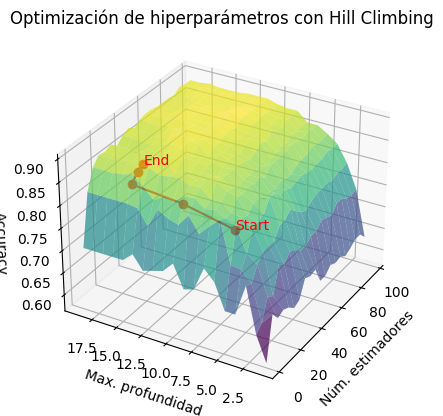

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Genera el dataset
np.random.seed(1)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42)

# Divide el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Función objetivo: accuracy de un RandomForestClassifier con los hiperparámetros dados
def objective_function(n_estimators, max_depth):
    # Crea un modelo con los hiperparámetros dados
    model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
    # Entrena el modelo
    model.fit(X_train, y_train)
    # Predice en el test set
    predictions = model.predict(X_test)
    # Calcula el accuracy
    return accuracy_score(y_test, predictions)

# Define el algoritmo de optimización hill climbing
def hill_climbing_optimization(objective, start_n_estimators, start_max_depth, n_iterations, step_size):
    history_n_estimators = [start_n_estimators]
    history_max_depth = [start_max_depth]
    history_accuracy = [objective(start_n_estimators, start_max_depth)]
    
    current_n_estimators, current_max_depth = start_n_estimators, start_max_depth
    current_accuracy = objective(current_n_estimators, current_max_depth)
    for iteration in range(n_iterations):
        # Decide aleatoriamente si se modifica n_estimators o max_depth
        if random.random() < 0.5:
            candidate_n_estimators = current_n_estimators + random.choice([-step_size, step_size])
            candidate_max_depth = current_max_depth
        else:
            candidate_n_estimators = current_n_estimators
            candidate_max_depth = current_max_depth + random.choice([-step_size, step_size])
        
        # Asegura que los valores sean enteros positivos
        candidate_n_estimators = max(1, int(candidate_n_estimators))
        candidate_max_depth = max(1, int(candidate_max_depth))
        
        # Evalua el candidato en la función objetivo
        candidate_accuracy = objective(candidate_n_estimators, candidate_max_depth)
        
        # Si el candidato es mejor, actualiza los valores actuales
        if candidate_accuracy > current_accuracy:
            current_n_estimators, current_max_depth = candidate_n_estimators, candidate_max_depth
            current_accuracy = candidate_accuracy
            history_n_estimators.append(current_n_estimators)
            history_max_depth.append(current_max_depth)
            history_accuracy.append(current_accuracy)
            print(f"Iteration {iteration}: n_estimators={current_n_estimators}, max_depth={current_max_depth}, accuracy={current_accuracy}")
    return history_n_estimators, history_max_depth, history_accuracy

# Parámetros
start_n_estimators = 10   # Número inicial de estimadores
start_max_depth = 5       # Número inicial de profundidad máxima
n_iterations = 30         # Número de iteraciones
step_size = 5             # Tamaño del paso para el ajuste de hiperparámetros

np.random.seed(1)
# Ejectua el algoritmo
history_n_estimators, history_max_depth, history_accuracy = hill_climbing_optimization(
    objective_function, start_n_estimators, start_max_depth, n_iterations, step_size)

# Visualización del resultado
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=ax.azim + 270)

# Crea una malla de puntos para representar la función objetivo
n_estimators_range = np.arange(1, 100, 5)
max_depth_range = np.arange(1, 20, 1)
n_estimators_grid, max_depth_grid = np.meshgrid(n_estimators_range, max_depth_range)
accuracy_grid = np.zeros(n_estimators_grid.shape)

for i in range(n_estimators_grid.shape[0]):
    for j in range(n_estimators_grid.shape[1]):
        accuracy_grid[i, j] = objective_function(n_estimators_grid[i, j], max_depth_grid[i, j])

# Representa la función objetivo
ax.plot_surface(n_estimators_grid, max_depth_grid, accuracy_grid, cmap='viridis', alpha=0.7)

# Representa el camino seguido por el algoritmo
ax.plot(history_n_estimators, history_max_depth, history_accuracy, 'o-', color='red', label='Optimization path')

# Anota el punto de inicio y fin
ax.text(history_n_estimators[0], history_max_depth[0], history_accuracy[0], "Start", color='red')
ax.text(history_n_estimators[-1], history_max_depth[-1], history_accuracy[-1], "End", color='red')

# Muestra el plot
ax.set_title('Optimización de hiperparámetros con Hill Climbing')
ax.set_xlabel('Núm. estimadores')
ax.set_ylabel('Max. profundidad')
ax.set_zlabel('Accuracy')
plt.show()

# Algoritmo de Búsqueda Tabú en Ciencia de Datos

La Búsqueda Tabú es un método de búsqueda metaheurística utilizado para resolver problemas variados y utilizado frecuentemente en optimización combinatoria. Está diseñado para navegar el espacio de soluciones más allá de la optimalidad local permitiendo movimientos que deterioran el valor de la función objetivo. La Búsqueda Tabú es particularmente útil en ciencia de datos para la selección de características, ajuste de hiperparámetros y resolución de problemas complejos donde los métodos tradicionales son ineficaces o demasiado lentos.

#### Conceptos Clave de la Búsqueda Tabú:

1. **Estructuras de Memoria**: Para evitar ciclos y fomentar la exploración, la Búsqueda Tabú mantiene una memoria a corto plazo de los movimientos recientes (lista tabú) y, a veces, una memoria a largo plazo para estrategias basadas en frecuencia.

2. **Restricciones Tabú**: Los movimientos que conducen a soluciones en la lista tabú están prohibidos a menos que se cumplan ciertos criterios de aspiración, que pueden anular el estado tabú si el movimiento resulta en una solución particularmente buena.

3. **Búsqueda de Vecindario**: En cada iteración, la Búsqueda Tabú explora un vecindario de la solución actual y selecciona la mejor solución candidata, incluso si es peor que la solución actual.

4. **Criterios de Aspiración**: Estas son reglas que permiten al algoritmo anular el estado tabú de un movimiento, típicamente si el movimiento resulta en una solución mejor que cualquier otra vista hasta ahora.

5. **Diversificación e Intensificación**: La Búsqueda Tabú incluye mecanismos para diversificar la búsqueda para explorar nuevas áreas del espacio de soluciones y para intensificar la búsqueda alrededor de áreas prometedoras.

#### Ejemplo de Algoritmo:

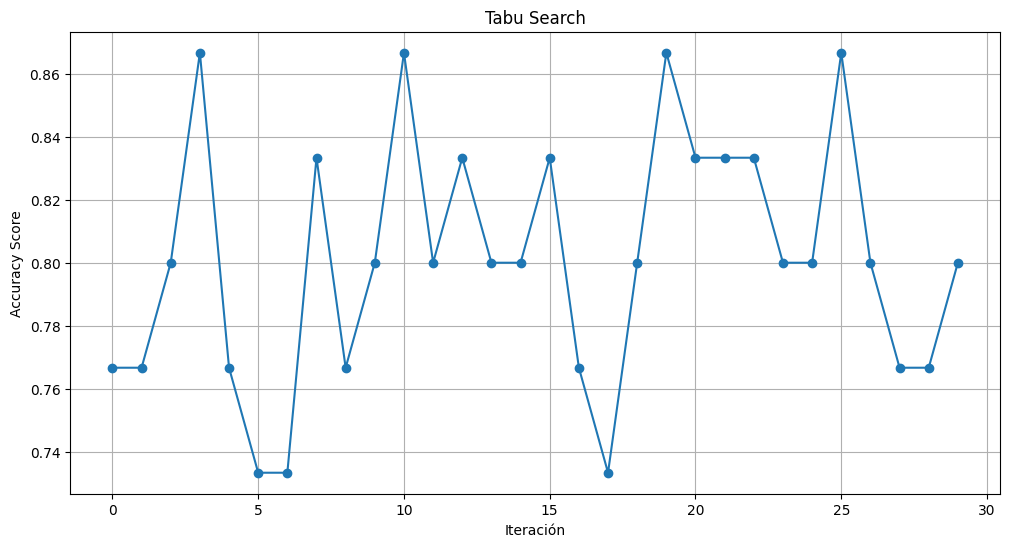

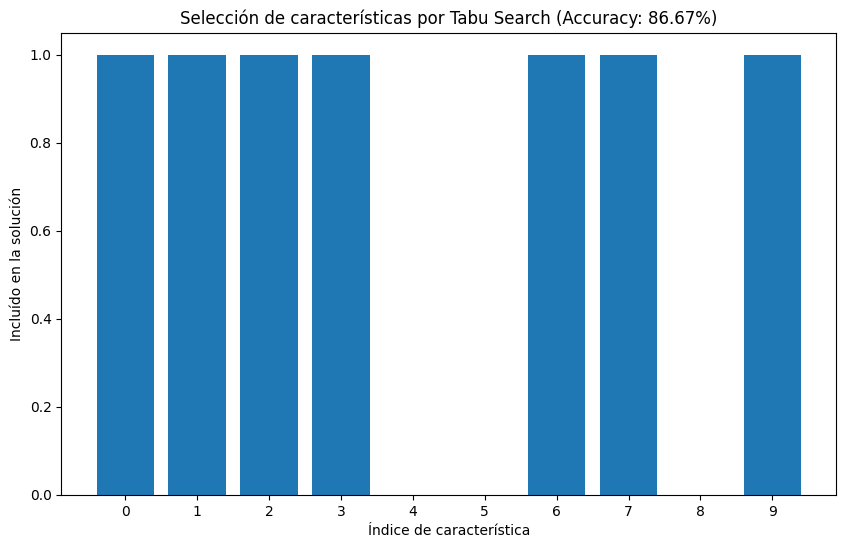

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Crea un dataset de ejemplo
from sklearn.datasets import make_classification
np.random.seed(1)
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=5)

# Divide el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


# Define una función para crear una solución vecina
def create_neighbor_solution(current_solution, tabu_list, feature_count):
    neighbor_solution = current_solution.copy()
    while True:
        # Seleccione un índice de característica aleatorio
        feature_index = np.random.randint(0, feature_count)
        neighbor_solution[feature_index] = not neighbor_solution[feature_index]  # Flip the bit

        # Comprombar si la solución vecina no está en la lista tabú
        if not any((neighbor == neighbor_solution).all() for neighbor in tabu_list):
            break

    return neighbor_solution

def tabu_search_feature_selection_with_history(X_train, y_train, X_test, y_test, iterations=30, tabu_list_size=5):
    feature_count = X_train.shape[1]
    current_solution = np.random.choice([True, False], size=feature_count)
    best_solution = current_solution.copy()
    best_score = 0
    score_history = []  # Lista para almacenar el historial de puntuaciones
    
    tabu_list = [current_solution.copy()]
    
    for iteration in range(iterations):
        neighbor_solution = create_neighbor_solution(current_solution, tabu_list, feature_count)

        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(X_train[:, neighbor_solution], y_train)
        y_pred = model.predict(X_test[:, neighbor_solution])
        score = accuracy_score(y_test, y_pred)

        score_history.append(score)  # Almaena la puntuación de la iteración actual

        if score > best_score and not any((neighbor == neighbor_solution).all() for neighbor in tabu_list):
            best_score = score
            best_solution = neighbor_solution.copy()

        tabu_list.append(neighbor_solution.copy())
        if len(tabu_list) > tabu_list_size:
            tabu_list.pop(0)

        current_solution = neighbor_solution

    return best_solution, best_score, score_history

# Ejectua el algoritmo
best_features, best_accuracy, history = tabu_search_feature_selection_with_history(X_train, y_train, X_test, y_test)

# Visualiza el historial de puntuaciones
def plot_search_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('Accuracy Score')
    plt.title('Tabu Search')
    plt.grid(True)
    plt.show()

plot_search_history(history)

# Visualiza la importancia de las características
def plot_feature_importance(solution, score):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(solution)), solution, tick_label=range(len(solution)))
    plt.xlabel('Índice de característica')
    plt.ylabel('Incluído en la solución')
    plt.title(f'Selección de características por Tabu Search (Accuracy: {score:.2%})')
    plt.show()

plot_feature_importance(best_features, best_accuracy)


# Optimización por Enjambre de Partículas

La Optimización por Enjambre de Partículas (PSO, por sus siglas en inglés) es un algoritmo de optimización estocástica basado en poblaciones, inspirado en el comportamiento social de bandadas de aves o cardúmenes de peces. El algoritmo mantiene una población de soluciones candidatas llamadas partículas, y cada partícula representa un punto en el espacio de búsqueda. Las partículas se mueven alrededor del espacio de búsqueda, y sus movimientos están influenciados por su propia mejor posición conocida y las mejores posiciones conocidas en el espacio de búsqueda. El algoritmo se inicializa con una población de soluciones aleatorias, y refina iterativamente las soluciones hasta que se cumple un criterio de detención.

#### Conceptos Clave de la Optimización por Enjambre de Partículas:

1. **Población**: La población es una colección de soluciones candidatas llamadas partículas. Cada partícula representa un punto en el espacio de búsqueda.

2. **Velocidad**: La velocidad de una partícula es un vector que determina cuán lejos y en qué dirección se mueve la partícula en cada iteración.

3. **Posición**: La posición de una partícula es un vector que representa un punto en el espacio de búsqueda.

4. **Aptitud**: La aptitud de una partícula es un valor escalar que representa la calidad de la posición de la partícula en el espacio de búsqueda.

5. **Mejor Local**: El mejor local es la mejor posición conocida de una partícula en el espacio de búsqueda.

6. **Mejor Global**: El mejor global es la mejor posición conocida de todas las partículas en el espacio de búsqueda.


Mejor solución mediante PSO en f([3.18541756 3.12972478])=-1.8083516042208303
Óptimo Global en f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


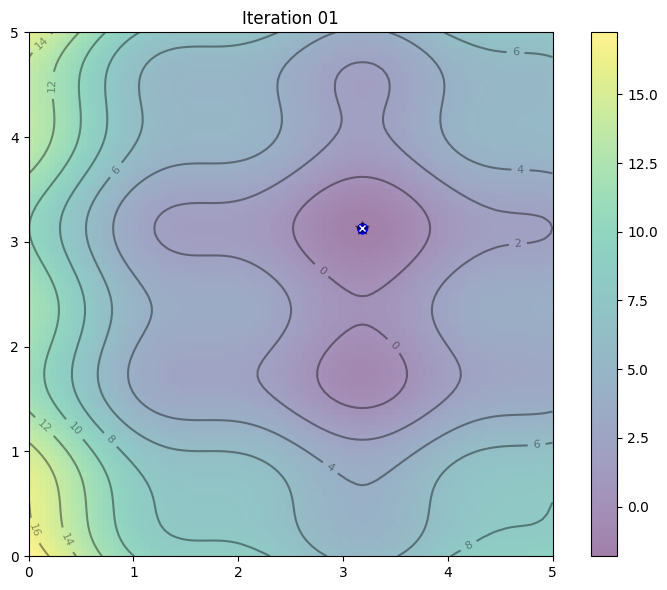

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Calcula la función objetivo en una malla de puntos
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Encuentra el mínimo global
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Elección de parámetros
c1 = c2 = 0.1
w = 0.8

# Crea partículas aleatorias
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

# Inicializa pbest y gbest (X_best(i) y X_best en los apuntes)
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Figura base para la animación
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

# Función de animación
def animate(i):
    "Pasos de PSO"
    title = 'Iteration {:02d}'.format(i)
    update()

    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=240, writer="pillow")

print("Mejor solución mediante PSO en f({})={}".format(gbest, gbest_obj))
print("Óptimo Global en f({})={}".format([x_min,y_min], f(x_min,y_min)))

<img src="PSO.gif" width="1000" align="center">


Función Beale visualizando también en 3D

IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x16c241d00> (for post_execute):


AttributeError: 'Path3DCollection' object has no attribute '_offset_zordered'

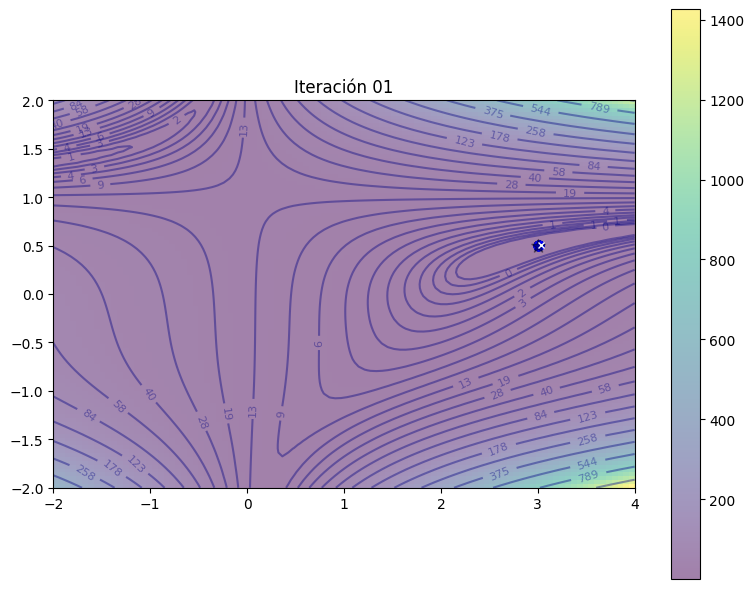

AttributeError: 'Path3DCollection' object has no attribute '_offset_zordered'

<Figure size 1000x1000 with 1 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation

def f(x,y):
    "Objective function"
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
    
x, y = np.array(np.meshgrid(np.linspace(-2,4,100), np.linspace(-2,2,100)))
z = f(x, y)

x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

c1 = c2 = 0.1
w = 0.8

n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles).T * np.array([6,4]) - np.array([2,2])
X = X.T
V = np.random.randn(2, n_particles) * 0.1

pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[-2, 4, -2, 2], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, levels=np.logspace(-.5, 5, 35), cmap=plt.cm.jet, alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([-2,4])
ax.set_ylim([-2,2])

# Preparación de la animación en 3D
x2 = np.linspace(-2, 4, 80)
y2 = np.linspace(-2,2, 80)
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.view_init(azim=ax2.azim + 90)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
X2, Y2 = np.meshgrid(x2, y2)
Z2= f(X2,Y2)
ax2.plot_wireframe(X2, Y2, Z2, color='r', linewidth=0.2)

images2 = []

def animate(i):
    "PSO"
    title = 'Iteración {:02d}'.format(i)
    update()

    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))

    # Actualización de la animación 3d
    image2 = ax2.scatter3D(X[0], X[1], f(X[0], X[1]), c='b')
    images2.append([image2])
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot

anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO_beale.gif", dpi=240, writer="pillow")

# Generación de la animación 3D
animated_image = animation.ArtistAnimation(fig2, images2)
animated_image.save('PSO_3d.gif', writer='pillow')

print("Mejor solución mediante PSO en f({})={}".format(gbest, gbest_obj))
print("Óptimo Global en f({})={}".format([x_min,y_min], f(x_min,y_min)))

<img src="PSO_beale.gif" width="1000" align="center">

<img src="PSO_3d.gif" width="1000" align="center">